# Harshavardhan_Aila UNT ID:11636549


# **Activity 1: Introduction to NLP basic techniques**



**Instructions:**

---

* Provide explanations for cells which you code in the tutorial by adding a text below the code cell.

* Note: your explanation must include how the code works and libraries used and why they are used.

* Submit **.ipynb and pdf**(do not use Ctrl+p to generate pdf, use some external ipynb to pdf converters Ex:onlineconvertfree.com, vertopal.com.etc ) to canvas.

* The similarity score should be less than 15%



# **Good Luck with the first NLP In class tasks ✌**

# Fundamentals of NLP: Tokenization


Natural language processing (NLP) has made substantial advances in the past few years due to the success of [modern techniques](https://nlpoverview.com/) that are based on [deep learning](https://en.wikipedia.org/wiki/Deep_learning). With the rise of the popularity of NLP and the availability of different forms of large-scale data, it is now even more imperative to understand the inner workings of NLP techniques and concepts, from first principles, as they find their way into real-world usage and applications that affect society at large. Building intuitions and having a solid grasp of concepts are both important for coming up with innovative techniques, improving research, and building safe, human-centered AI and NLP technologies.

In this first chapter, which is part of a series called **Fundamentals of NLP**, we will learn about some of the most important **basic concepts** that power NLP techniques used for research and building real-world applications. Some of these techniques include *lemmatization*, *stemming*, *tokenization*, and *sentence segmentation*. These are all important techniques to train efficient and effective NLP models. Along the way, we will also cover best practices and common mistakes to avoid when training and building NLP models. We also provide some exercises for you to keep practicing and exploring some ideas.


In every chapter, we will introduce the theoretical aspect and motivation of each concept covered. Then we will obtain hands-on experience by using bootstrap methods, industry-standard tools, and other open-source libraries to implement the different techniques. Along the way, we will also cover best practices, share important references, point out common mistakes to avoid when training and building NLP models, and discuss what lies ahead.

---

## Tokenization



With any typical NLP task, one of the first steps is to tokenize your pieces of text into its individual words/tokens (process demonstrated in the figure above), the result of which is used to create so-called vocabularies that will be used in the langauge model you plan to build. This is actually one of the techniques that we will use the most throughout this series but here we stick to the basics. Tokenization is a foundational step that transforms raw text into a structured format suitable for various NLP tasks and machine learning applications

Below I am showing you an example of a simple tokenizer without any following any standards. All it does is extract tokens based on a white space seperator.

Try to running the following code blocks.

In [60]:
doc = "I love coding and writing"
for i, w in enumerate(doc.split(" ")):#enumerate() is used to iterate over a sequence while keeping track of both the index and corresponding value
    print("Token " + str(i) + ": " + w)

Token 0: I
Token 1: love
Token 2: coding
Token 3: and
Token 4: writing


All the code does is separate the sentence into individual tokens. The above simple block of code works well on the text I have provided. But typically, text is a lot noisier and complex than the example I used. For instance, if I used the word "so-called" is that one word or two words? For such scenarios, you may need more advanced approaches for tokenization. You can consider stripping away the "-" and splitting into two tokens or just combining into one token but this all depends on the problem and domain you are working on.

Another problem with our simple algorithm is that it cannot deal with extra whitespaces in the text. In addition, how do we deal with cities like "New York" and "San Francisco"?


---
**Q 1**: Copy the code from above and add extra whitespaces to the string value assigned to the `doc` variable and identify the issue with the code. Then try to fix the issue. Hint: Use `text.strip()` to fix the problem.

In [61]:
###  ENTER CODE HERE
doc = "  I    love    coding   and   writing  "
for i, w in enumerate(doc.split(" ")):
    print("Token " + str(i) + ": " + w)
###

Token 0: 
Token 1: 
Token 2: I
Token 3: 
Token 4: 
Token 5: 
Token 6: love
Token 7: 
Token 8: 
Token 9: 
Token 10: coding
Token 11: 
Token 12: 
Token 13: and
Token 14: 
Token 15: 
Token 16: writing
Token 17: 
Token 18: 


# In the above code I have added extra spaces in the doc and tried to run the code. It prints the different token which considers each space bar as one token irrespective of postion of space either it may be in start or in middle of words or in the end of sentence.

Using text.strip() to fix the problem

In [62]:
doc = "  I    love    coding   and   writing  "
doc = doc.strip()
for i, w in enumerate(doc.split(" ")):
    print("Token " + str(i) + ": " + w)

Token 0: I
Token 1: 
Token 2: 
Token 3: 
Token 4: love
Token 5: 
Token 6: 
Token 7: 
Token 8: coding
Token 9: 
Token 10: 
Token 11: and
Token 12: 
Token 13: 
Token 14: writing


In the above code I tried to remove the spaces by using the text.strip() function as doc.strip() where the spaces are removed from the start and end of sentence but it couldnt remove the extra spaces between the words.This is what I have observed. 

---

Tokenization can also come in different forms. For instance, more recently a lot of state-of-the-art NLP models such as [BERT](https://arxiv.org/pdf/1810.04805.pdf) make use of `subword` tokens in which frequent combinations of characters also form part of the vocabulary. This helps to deal with the so-called out of vocabulary (OOV) problem. We will discuss this in upcoming chapters, but if you are interested in reading more about this now, check this [paper](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/37842.pdf).

To demonstrate how you can achieve more reliable tokenization, we are going to use [spaCy](https://spacy.io/), which is an impressive and robust Python library for natural language processing. In particular, we are going to use the built-in tokenizer found [here](https://spacy.io/usage/linguistic-features#sbd-custom).

Run the code block below.

**spaCy**: spaCy is an open-source Python library for natural language processing (NLP). It provides tools to efficiently process and analyze text data, offering features like tokenization, part-of-speech tagging, named entity recognition, and more. Known for its speed and accuracy, spaCy is widely used in NLP tasks for extracting insights and information from text.

In [63]:
!pip install -U spacy
#!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 13.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [66]:
## required libraries that need to be installed
%%capture
!pip install -U spacy
#!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm

UsageError: Line magic function `%%capture` not found.


In [67]:
## import the libraries
import spacy #opensource lib used for tokenization,lemmatization and provides pre trained models
## load the pre trained language model
nlp = spacy.load("en_core_web_sm") #"en" indicates English, "core" suggests that it's a core language model, "web" refers to the source of the training data, and "sm" stands for "small"

## tokenization
doc = nlp("This is the so-called lemmatization")
for token in doc:
    print(token.text)

This
is
the
so
-
called
lemmatization


---
**NLTK** (Natural Language Toolkit) is a Python library that provides tools and resources for working with human language data, enabling tasks like text processing, analysis, and understanding. It's widely used for various natural language processing tasks, offering functions for tasks like tokenization, part-of-speech tagging, and more

In [68]:
import nltk
nltk.download('punkt')#Punkt is a pre-trained sentence tokenizer provided by NLTK that can intelligently split text into individual sentences
from nltk.tokenize import word_tokenize #word_tokenize function is used to split a piece of text into individual words or tokens
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

**Q 2**: Copy the code from above and extend  the code to print tokens from the given sentence that have a length greater than 5?

In [69]:
##CODE HERE
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

doc = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(doc)
filtered_tokens = [token for token in tokens if len(token) > 5]

print(filtered_tokens)

["o'clock", 'Thursday', 'morning', 'Arthur']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In the above code I have imported the necessary modules from NLTK, then defined the doc that we want to tokenize and filter later I tried to tokenize the sentence into individual words or tokens using word_tokenize and defined a new list called filtered_tokens to store the tokens that have a length greater than 5. Finally printed the each filtered_tokens in list.

---
**Gensim** is a Python library designed for topic modeling and document similarity analysis. It specializes in handling large text corpora efficiently. Gensim provides tools for tasks like topic modeling, word embedding, and document similarity calculation. It's widely used for uncovering hidden patterns in text data and generating insights from unstructured text.

In summary, Gensim is a powerful library in the field of natural language processing (NLP) that focuses on tasks related to text analysis and modeling, such as extracting topics from documents and creating word embeddings.

In [70]:
#genism work tokenization
!pip install gensim
from gensim.utils import tokenize
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed
liquid-fuel launch vehicle to orbit the Earth."""
list(tokenize(text))

['Founded',
 'in',
 'SpaceX',
 's',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 'planet',
 'species',
 'by',
 'building',
 'a',
 'self',
 'sustaining',
 'city',
 'on',
 'Mars',
 'In',
 'SpaceX',
 's',
 'Falcon',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth']

**Q 3**. Now based on above word tokenizations perform a **sentence** tokenization using spacy or nltk?

In [71]:
##CODE HERE
import spacy

nlp = spacy.load('en_core_web_sm')
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."""

doc = nlp(text)

sentences = [sent.text for sent in doc.sents]

print(sentences)

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars.', 'In 2008, SpaceX’s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth.']


In [72]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."""

sentences = sent_tokenize(text)

print(sentences)

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars.', 'In 2008, SpaceX’s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In the above I tried to practice by implementing both methods. Both methods will give us a list of sentences extracted from the provided text. Sentence tokenization is the process of splitting a text into individual sentences. Spacy and NLTK provide convenient functions and models for performing this task.

All the code does is tokenize the text based on a pre-built language model.

Try putting different running text into the `nlp()` part of the code above. The tokenizer is quiet robust and it includes a series of built-in rules that deal with exceptions and special cases such as those tokens that contain puctuations like "`" and ".", "-", etc. You can even add your own rules, find out how [here](https://spacy.io/usage/linguistic-features#special-cases).

In a later chapter of the series, we will do a deep dive on tokenization and the different tools that exist out there that can simplify and speed up the process of tokenization to build vocabularies. Some of the tools we will explore are the [Keras Tokenizer API](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) and [Hugging Face Tokenizer](https://github.com/huggingface/tokenizers).  

---

**BeautifulSoup**: Beautiful Soup is a Python library used for web scraping. It helps extract data from HTML and XML documents by providing methods to parse and navigate their content. Beautiful Soup simplifies the process of extracting information from web pages, making it accessible for various data collection and analysis tasks.

In [73]:
#code block 1
#import the required libraries

from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

First, we will grab a web page content then we will analyze the text to see what the page is about.
We will use the urllib module to crawl the web page:

In [74]:
#code block 2

import urllib.request

#open and read the spacex data
response = urllib.request.urlopen('http://php.net/')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="icon" type="image/svg+xml" sizes="any" href="https://www.php.net/favicon.svg?v=2">\n <link rel="icon" type="image/png" sizes="196x196" href="https://www.php.net/favicon-196x196.png?v=2">\n <link rel="icon" type="image/png" sizes="32x32" href="https://www.php.net/favicon-32x32.png?v=2">\n <link rel="icon" type="image/png" sizes="16x16" href="https://www.php.net/favicon-16x16.png?v=2">\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico?v=2">\n\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type=

As you can see from the printed output, the result contains a lot of HTML tags that need to be
cleaned. We can use BeautifulSoup to clean the grabbed text like this:

In [75]:
#code block 3
#apply beautifulsoap(used for web scraping) and split the text
soup = BeautifulSoup(html,"html5lib") #"html5lib" parser is a robust parser that can handle poorly formatted HTML and produces a consistent and accurate representation of the document's structure.
text = soup.get_text(strip=True)
print(text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesPredefined AttributesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUser Submitted DataHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Spec

Now we have a clean text from the crawled web page.
Awesome, right? Finally, let’s convert that text into tokens by splitting the text like this:


In [76]:
#code block 4
#split the text into tokens
tokens = [t for t in text.split()]
print(tokens)
clean_tokens = tokens[:]
#print(clean_tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesPredefined', 'AttributesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUser', 'Submitted', 'DataHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsCommand',

**Stopwords** are commonly used words that are filtered out from text during text preprocessing in natural language processing (NLP) tasks. These words are considered to be of little value in many NLP analyses because they are very frequent and don't carry significant meaning by themselves. Filtering out stopwords can help improve the efficiency of text analysis and reduce noise in the data.

Examples of stopwords in English include words like "the," "and," "is," "of," "in," "to," "for," "that," and so on.


**Count word frequency**
The text is much better now. Let’s calculate the frequency distribution of those tokens using
Python NLTK. There is a function in NLTK called FreqDist() does the job:

In [77]:
#code block 5

#remove the simpe repetitive english words using stopwords
sr = stopwords.words('english')
for token in tokens:
  if token in stopwords.words('english'):
     clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
#del_tokens = freq.copy()

If you search the output, you’ll find that the most frequent token is PHP. You can plot a graph
for those tokens using plot function like this:


PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesPredefined:1
AttributesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUser:1
Submitted:1
DataHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

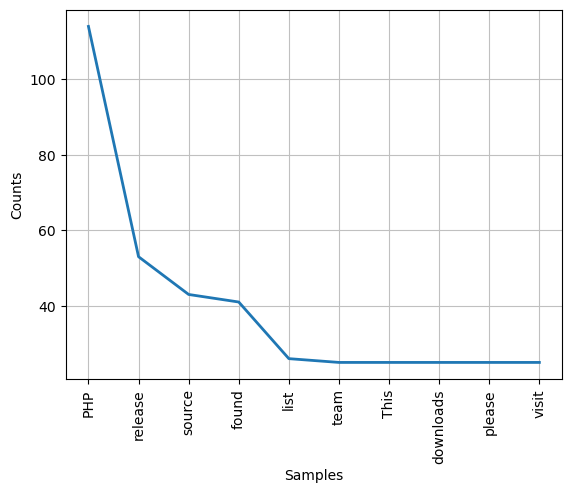

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [78]:
#code block 6
#print and plot the 10 tokens with  high frequency
for key,val in freq.items():
    print (str(key) + ':' + str(val))
freq.plot(10,cumulative=False)

###**PIE CHART REPRESENTATION**

([<matplotlib.patches.Wedge at 0x21e8bad8c40>,
 [Text(0.6915841484685735, 0.8554012892128456, 'PHP'),
  Text(-0.6437787781863626, 0.8919354711843644, 'release'),
  Text(-1.079072931061106, 0.21354533348025612, 'source'),
  Text(-0.9851299836144599, -0.48940669732214953, 'found'),
  Text(-0.6084442288788122, -0.9164036339648964, 'list'),
  Text(-0.2051060044098503, -1.0807088076605218, 'team'),
  Text(0.2219716459075988, -1.0773711470115912, 'This'),
  Text(0.6155872615038946, -0.9116207125082975, 'downloads'),
  Text(0.9164036268440637, -0.6084442396038, 'please'),
  Text(1.0790729335603004, -0.21354532085149397, 'visit')])

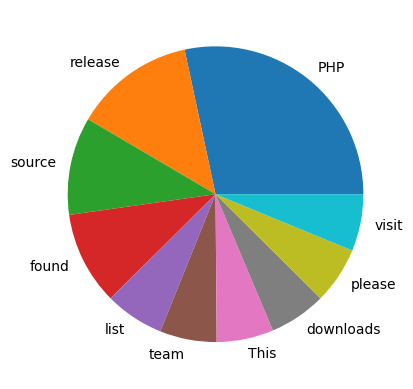

In [79]:
#code block 7
#pie chart representation for the 10 high frequency tokens from spaces web apge
import matplotlib.pyplot as plt
a = dict(freq)
sort = sorted(a, key=a.get,reverse=True)
count =0
b = {}
for i in sort:
    b[i] = a[i]
    count+= 1
    if count == 10:
       break
x = b.keys()
v = b.values()
plt.pie(v,labels=x)

###**BAR GRAPH REPRESENTATION**

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Counter({'NLTK': 2, 'for': 2, '.': 2, 'is': 1, 'a': 1, 'powerful': 1, 'library': 1, 'natural': 1, 'language': 1, 'processing': 1, 'provides': 1, 'tools': 1, 'text': 1, 'analysis': 1})


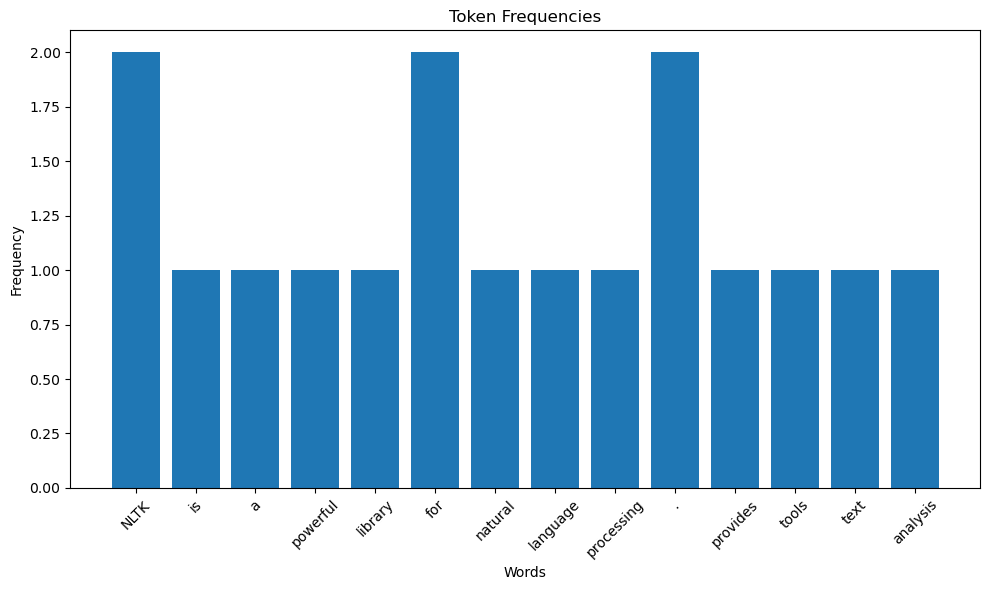

In [80]:
#EXAMPLE

import nltk
nltk.download('punkt')  # Download necessary data
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter

# Sample text
text = "NLTK is a powerful library for natural language processing. NLTK provides tools for text analysis."

# Tokenize the text
tokens = word_tokenize(text)

# Count word frequencies
word_counts = Counter(tokens)
print(word_counts)
# Separate words and their frequencies
words = list(word_counts.keys())
frequencies = list(word_counts.values())

# Create a bar graph
plt.figure(figsize=(10,6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Token Frequencies')
plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()

---
##Work on **code block 2** and use the same code concept below to parse data from any live website that talk about SpaceX Technologies and plot any graph for those tokens of your own choice which is not given above.
####Note: Please keep in mind that do not put all code in one block split in a fashionable way.

In [81]:
#CODE HERE
#Here I'm importing necessary libraries required for the task
import urllib.request
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Here im trying to Open and read the SpaceX data from the URL
response = urllib.request.urlopen('https://www.spacex.com/updates/')
html = response.read()

In [83]:
# Here I'm Applying BeautifulSoup for web scraping and splitting the text
soup = BeautifulSoup(html, "lxml")
text = soup.get_text(strip=True)

In [84]:
# Here I'm Splitting the text into tokens
tokens = [t for t in text.split()]

In [85]:
#Here I'm Removing repetitive English words using stopwords
clean_tokens = [token for token in tokens if token.lower() not in stopwords.words('english')]

In [86]:
#Here I'm Calculating the frequency distribution of words
freq = nltk.FreqDist(clean_tokens)

In [87]:
#Here I'm trying to Print and plot the 10 tokens which has high frequency
top_10 = freq.most_common(10)
for token, count in top_10:
    print(f"{token}: {count}")

satellites: 51
Space: 48
SpaceX: 47
Dragon: 47
first: 44
orbit: 39
flight: 38
mission: 38
Falcon: 38
satellite: 34


C:\Users\19408\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


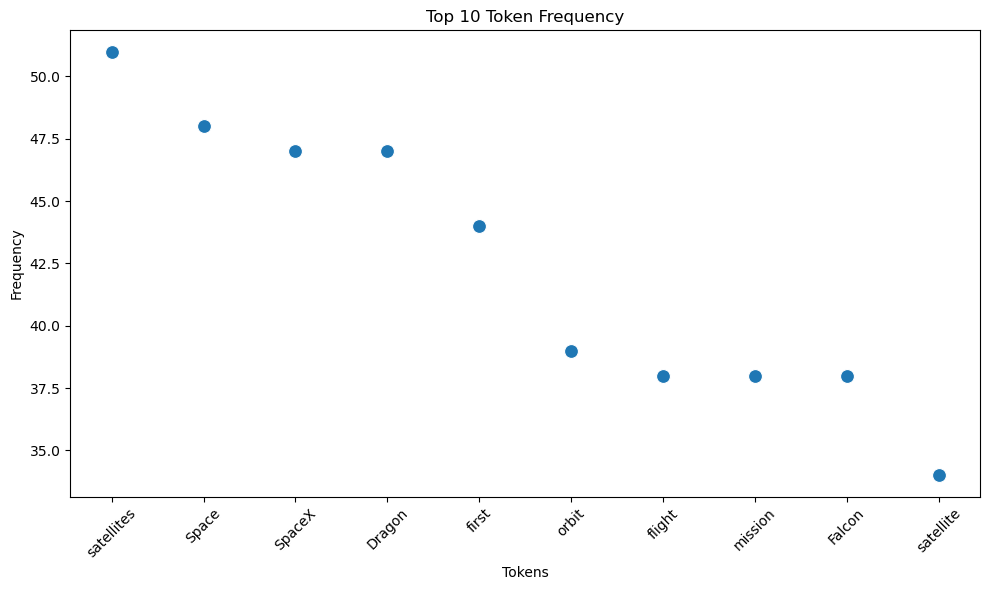

In [88]:
#Finally I'm Creating a scatter plot for the top 10 tokens to visualize the data 
tokens, counts = zip(*top_10)
x = range(1, len(tokens) + 1)

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x, counts, s=100)
plt.xticks(x, tokens, rotation=45)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Token Frequency')
plt.tight_layout()
plt.show()

Here I am trying with different visualization wordcloud. #for my knowledge purpose

In [89]:
!pip install wordcloud

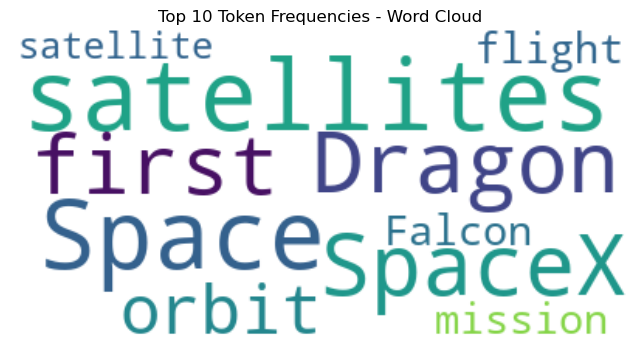

In [90]:
from wordcloud import WordCloud

# Create a dictionary of token frequencies
freq_dict = dict(zip(tokens, counts))

# Generate the word cloud image
wordcloud = WordCloud(background_color='white').generate_from_frequencies(freq_dict)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Token Frequencies - Word Cloud')
plt.show()

#What do you understand by the tutorial. Explain briefly?
-->

From the above tutorial I have understood What is Natural Language processing in practical way and some of the techniques involved in NlP. I have tried to play with code using different NLP libraries.
I got energised after executing the code using URL on spaceX Technologies and running the code and seeing the differences between each step after execution.
Here I have imported the necessary libraries like urllib.request is used to open and read the URL content. BeautifulSoup from the bs4 library is used for web scraping. nltk is the Natural Language Toolkit library, which provides various tools for working with human language data. matplotlib.pyplot is used for creating visualizations.
I used urllib.request.urlopen() to open the SpaceX/updates URL and read its content. Here the HTML content of the page is stored in the html variable.
I have also used BeautifulSoup to parse the HTML content obtained from the URL. The "lxml" argument specifies the parser to be used. Then, I have extracted the text from the parsed HTML using soup.get_text(strip=True). The strip=True argument removes any leading or trailing whitespace in the sentence.
I tried to split the text into tokens using the split() method which will create a list of words from the text.
I have also used a list comprehension to remove common English stopwords from the tokens. We utilize the stopwords.words('english') function from the nltk.corpus module to get a list of English stopwords. We convert the tokens to lowercase and exclude any tokens that are stopwords and  I have created a frequency distribution using the nltk.FreqDist() function which calculates the frequency of each token in the clean_tokens list for better understanding of occurance of the words.
I have also retrieved the top 10 most common tokens and their corresponding counts using the most_common() method of the FreqDist object, Then iterated over these top tokens and printed them along with their counts.
Finally, I created a scatter plot and The x-axis represents the tokens, which are the most common words or terms found in the text. These tokens include words like "SpaceX," "mission," "launch," "Dragon," and others. The y-axis represents the frequency of each token, indicating how many times each token appears in the text. The higher the point on the y-axis, the more frequently the token appears in the text. Each point in the scatter plot represents a token, and its position on the plot corresponds to its frequency. The size of the points is set to 100, making them easily visible. The scatter plot gives a visual representation of the distribution of token frequencies. Finally, plt.show() displays the plot.

In [1]:
!jupyter nbconvert --to html "E:\UNT\4th Sem Spring_2024\NLP\Act-1\Harshavardhan_Aila_Activity_1_Tokenization(3)(1)(1) (1)"

[NbConvertApp] Converting notebook E:\UNT\4th Sem Spring_2024\NLP\Act-1\Harshavardhan_Aila_Activity_1_Tokenization(3)(1)(1) (1).ipynb to html
[NbConvertApp] Writing 842244 bytes to E:\UNT\4th Sem Spring_2024\NLP\Act-1\Harshavardhan_Aila_Activity_1_Tokenization(3)(1)(1) (1).html
